In [1]:
import pandas as pd
import numpy as np
from itertools import chain
import patsy
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import plotly.express as px
%matplotlib inline

In [2]:
rg_outside = pd.read_csv('/stanley/robinson/ccarey/UKBB/factor_gwas/factor_analysis/cfa/FINAL_CFA/FACTOR_SCORES/OUTSIDERG/rg_t2d_mat.tsv',sep="\s+",header=None).set_index(0)

In [3]:
rg_outside.index = [x.split("/")[1].split(".")[0] for x in rg_outside.index]

In [4]:
rgkey = pd.read_table('/stanley/robinson/ccarey/UKBB/factor_gwas/factor_analysis/cfa/FINAL_CFA/FACTOR_SCORES/OUTSIDERG/outsiderg_key3.tsv')

In [5]:
phendict = dict(zip(rgkey.filename,rgkey.phenoname))

In [6]:
rg_outside = rg_outside.loc[sorted(rg_outside.index,key=lambda e: int(e[4:]))]

In [7]:
rg_outside.index = [phendict[x] for x in rg_outside.index]

In [8]:
rg_outside.columns = ["f28","T2D","T2D_adjBMI"]

In [9]:
rgkey = rgkey.set_index("phenoname")

In [10]:
rg_outside

,f28,T2D,T2D_adjBMI
parkinson's disease,-0.0356,-0.0520,-0.0071
alzheimer's disease,0.0615,0.1266,0.1215
stroke,0.0967,0.3226,0.2611
epilepsy,0.0353,0.1756,0.1245
BMI,0.2274,0.4899,0.0889
...,...,...,...
EA indirect,-0.2304,-0.3851,-0.2563
risk-taking PC,-0.0074,-0.0183,-0.0436
risk-taking binary,0.0808,0.0560,0.0091
t2d no BMI,0.6537,0.9086,1.0000


In [11]:
rg_outside.T.columns

Index(['parkinson's disease', 'alzheimer's disease', 'stroke', 'epilepsy',
       'BMI', 'height', 'WHR', 'waist circumference', 'hip circumference ',
       'body fat percentage', 'lean body mass', 'infant head circumference',
       'birth weight', 'birth length', 'coronary artery disease',
       'atrial fibrilation', 'heart failure', 't2d', 'type 1 diabetes',
       'systolic blood pressure', 'resting heart rate', 'fasting glucose',
       'fasting insulin', 'neuroticism', 'extraversion', 'openness',
       'conscientiousness', 'agreeableness', 'autism spectrum disorders',
       'adhd', 'anorexia nervosa', 'bipolar disorder',
       'major depressive disorder', 'schizophrenia', 'ptsd', 'ldl cholesterol',
       'hdl cholesterol', 'triglycerides', 'total cholesterol',
       'alcohol dependence', 'alcohol drinks per week',
       'cannabis lifetime use', 'cannabis use disorder', 'smoking initiation',
       'smoking cigs per day', 'atopic dermatitis (eczema)',
       'inflammatory 

In [12]:
selects = rg_outside.T[["BMI","WHR","waist circumference","hip circumference ","body fat percentage","lean body mass","birth weight","coronary artery disease","atrial fibrilation","heart failure","t2d","type 1 diabetes","systolic blood pressure","resting heart rate","fasting glucose","fasting insulin","ldl cholesterol","hdl cholesterol","triglycerides","total cholesterol","educational attainment"]]

In [13]:
selects = selects.rename({"hip circumference ":"hip circumference"}, axis=1)
selects = selects.rename({"t2d":"type 2 diabetes", "BMI":"body mass index","WHR":"waist-hip ratio"}, axis=1)

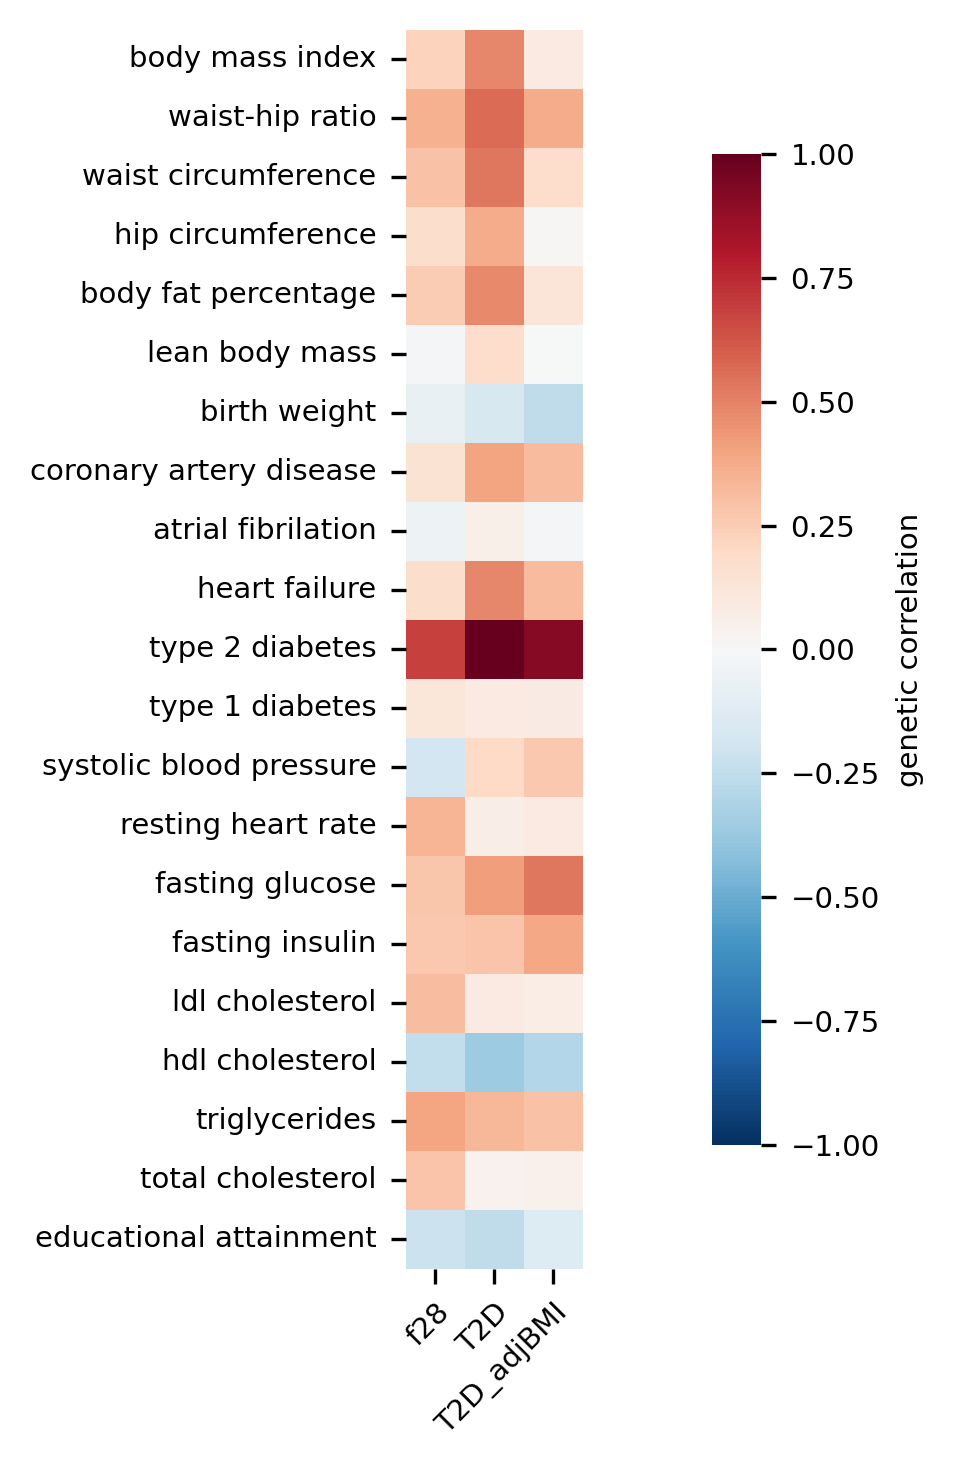

In [14]:
fig = plt.figure(figsize=(3.464, 5),dpi=300)
ax = plt.gca()

sns.heatmap(selects.T,cmap=sns.color_palette("RdBu_r",as_cmap=True),vmin=-1,vmax=1,square=True,cbar_kws={"shrink": 0.8, "label": "genetic correlation", "pad":0.15})

ax.collections[0].colorbar.ax.tick_params(labelsize=7)
# ax = plt.gca()
ax.set_xticks(np.arange(1,4)-0.5, selects.index.tolist(), size=6, rotation=45, horizontalalignment='right', rotation_mode='anchor')
# ax.set_xticklabels(np.arange(1,4), selects.index.tolist(), )
ax.tick_params(axis='both', which='major', labelsize=7)
ax.figure.axes[-1].yaxis.label.set_size(7)



fig.tight_layout()

plt.savefig("/stanley/robinson/ccarey/factor_paper_revision/edfigs_CEC/EDFig8.eps") #bbox_inches="tight",
#plt.show()

# fig= px.imshow(selects.T,x=selects.T.columns,y=selects.T.index,color_continuous_scale="RdBu_r",zmin=-1,zmax=1,width=400,height=600)
#fig.update_coloraxes(showscale=False)
# fig.show()

In [15]:
selects.index.tolist()

['f28', 'T2D', 'T2D_adjBMI']